In [1]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA as sklearnPCA


In [4]:
train_df = pd.read_csv("./train_2016_v2.csv")


In [5]:
prop= pd.read_csv("./properties_2016.csv",low_memory=False) 


In [6]:
##Variables which have too many missing values (>80%) are dropped since they will not provide much information for the analysis. 
zillow= prop.drop(['storytypeid', 'basementsqft', 'yardbuildingsqft26', 'fireplaceflag', 'architecturalstyletypeid', 
            'typeconstructiontypeid', 'finishedsquarefeet13', 'buildingclasstypeid',
            'decktypeid', 'finishedsquarefeet6', 'poolsizesum', 'pooltypeid2', 'pooltypeid10', 'taxdelinquencyflag',
            'taxdelinquencyyear', 'hashottuborspa', 'yardbuildingsqft17', 'finishedsquarefeet15', 'finishedsquarefeet50',
            'finishedfloor1squarefeet', 'threequarterbathnbr', 'fireplacecnt', 'pooltypeid7', 'poolcnt',
             'calculatedbathnbr','censustractandblock','propertyzoningdesc', 'propertycountylandusecode'], axis=1)

In [7]:
train = pd.merge(train_df, zillow, on='parcelid', how='left')
train.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,regionidzip,roomcnt,unitcnt,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount
0,11016594,0.0276,2016-01-01,1.0,2.0,3.0,4.0,1684.0,1684.0,6037.0,...,96370.0,0.0,1.0,1959.0,NaN,122754.0,360170.0,2015.0,237416.0,6735.88
1,14366692,-0.1684,2016-01-01,NaN,3.5,4.0,NaN,2263.0,2263.0,6059.0,...,96962.0,0.0,NaN,2014.0,NaN,346458.0,585529.0,2015.0,239071.0,10153.02
2,12098116,-0.0040,2016-01-01,1.0,3.0,2.0,4.0,2217.0,2217.0,6037.0,...,96293.0,0.0,1.0,1940.0,NaN,61994.0,119906.0,2015.0,57912.0,11484.48
3,12643413,0.0218,2016-01-02,1.0,2.0,2.0,4.0,839.0,839.0,6037.0,...,96222.0,0.0,1.0,1987.0,NaN,171518.0,244880.0,2015.0,73362.0,3048.74
4,14432541,-0.0050,2016-01-02,NaN,2.5,4.0,NaN,2283.0,2283.0,6059.0,...,96961.0,8.0,NaN,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96


In [9]:
train['transactiondate'] = pd.to_datetime(train['transactiondate'])
train['transactionMonth'] = train['transactiondate'].dt.strftime('%b')

In [10]:
for l in train[['transactionMonth']]:
    label = LabelEncoder()
    label.fit(list(train[l].values))
    train[l] = label.transform(list(train[l].values))

In [22]:
# split data table into data X and class labels y

X = train.drop(['parcelid', 'logerror', 'transactiondate'], axis=1)
y = train['logerror'].values

In [25]:
#Dealing NaN with imputer
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
X = imp.fit_transform(X)


In [26]:
names = train.drop(['parcelid', 'logerror', 'transactiondate'], axis=1).columns

In [27]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [36]:
sklearn_pca = sklearnPCA(n_components=30)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [37]:
sklearn_pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
#The amount of variance that each PC explains
var= sklearn_pca.explained_variance_ratio_
var

array([  6.22328300e-01,   2.14275225e-01,   6.77528474e-02,
         3.50100939e-02,   2.63859547e-02,   1.65207169e-02,
         1.49531507e-02,   2.71892717e-03,   3.09596907e-05,
         1.69731887e-05,   5.68432882e-06,   9.46115103e-07,
         1.42651853e-07,   5.20638135e-08,   2.55727683e-08,
         5.13000604e-10,   2.38364492e-11,   1.51285751e-11,
         1.03657219e-11,   4.31705377e-12,   2.63311549e-12,
         2.28436505e-12,   1.11868649e-12,   5.28332521e-13,
         4.10770702e-13,   8.97181066e-14,   7.54869088e-14,
         4.43307407e-14,   3.28573230e-14,   3.17851461e-33])

In [39]:
#Cumulative Variance explains
var1=np.cumsum(np.round(sklearn_pca.explained_variance_ratio_, decimals=4)*100)

print (var1)

[  62.23   83.66   90.44   93.94   96.58   98.23   99.73  100.    100.
  100.    100.    100.    100.    100.    100.    100.    100.    100.
  100.    100.    100.    100.    100.    100.    100.    100.    100.
  100.    100.    100.  ]


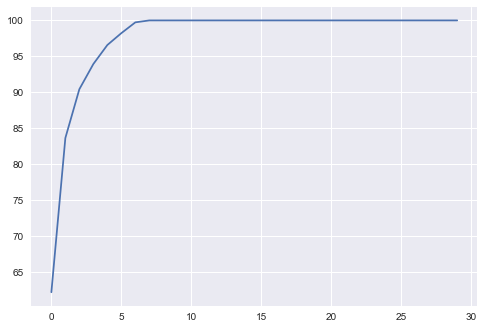

In [41]:
plt.plot(var1)

In [44]:
#Looking at above plot I'm taking 7 variables
pca = sklearnPCA(n_components=7)
pca.fit(X)
X1=pca.fit_transform(X)
var1= pca.explained_variance_ratio_
var1


array([ 0.6223283 ,  0.21427523,  0.06775285,  0.03501009,  0.02638595,
        0.01652072,  0.01495315])